In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
students = pd.read_csv("BUSinT.csv")



# students.set_index("roll_no",inplace=True)

students["class"] = students["roll_no"].str.split('/').str[1]
students["Total marks"] = 100
students["obt marks"] = students["exam1"]+students["exam2"]+students["final_exam"]
students["perc"] = students["obt marks"]/students["Total marks"]*100

def grades(score):
    if score >= 80:
        return "A"
    elif score >= 70:
        return "B"
    elif score >= 60:
        return "C"
    elif score >= 50:
        return "D"
    else:
        return "F"

students['grades'] = students["perc"].apply(grades)



students_group = students.groupby("grades")

for i in students_group:
    i['class']

TypeError: tuple indices must be integers or slices, not str

In [10]:
students['grades'].unique() 

array(['B', 'C', 'A', 'F', 'D'], dtype=object)

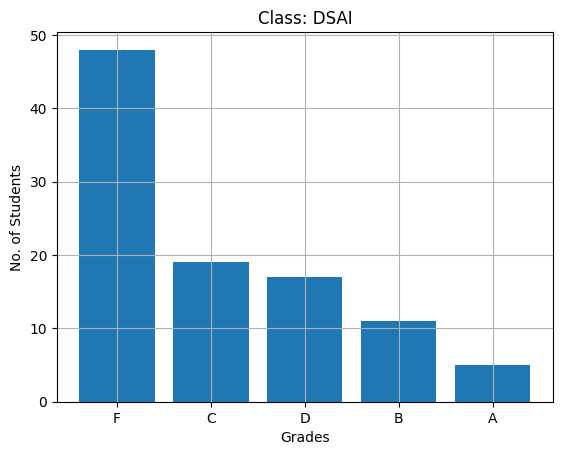

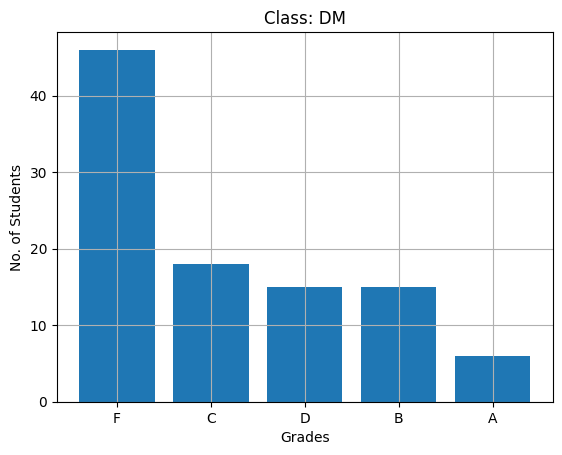

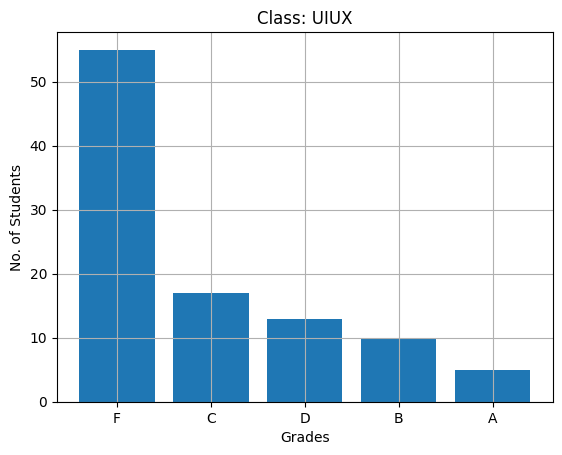

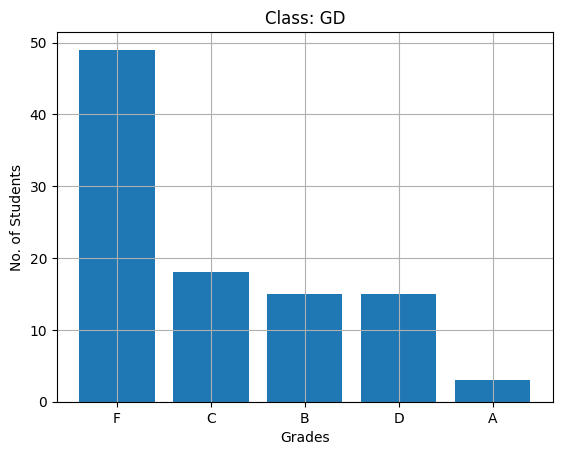

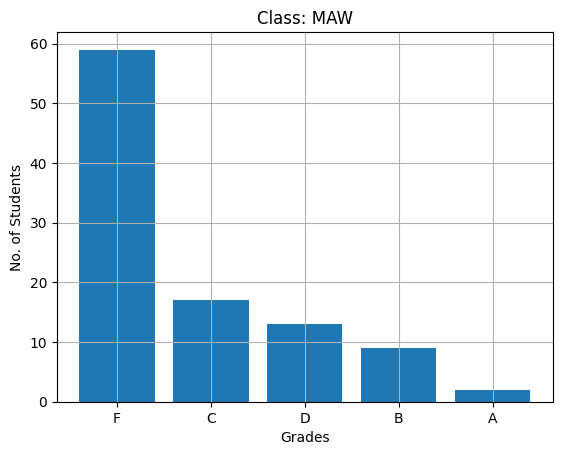

In [3]:
grouped  = students.groupby('class')

for i in students['class'].unique():
    chart_value = grouped.get_group(i).grades.value_counts()
    plt.title(f"Class: {i}")
    plt.xlabel('Grades')
    plt.ylabel('No. of Students')
    plt.bar(chart_value.index,chart_value.values)
    plt.grid(True)
    plt.show()